

# Project: Investigating The Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information of about 10,000 movies collected from movie database.

>The following are the columns and their meanings: 
Id - The unique identifier of the data 
imdb_id - International Movie Database identifier 
popularity - Popularity index per movie 
budget - Amount spent in making movie 
revenue - Total Amount received from movie
original_title - Name of the movie 
cast - Actors/Actresses that starred in the movie 
homepage - Movie website 
director - Movie director
tagline - Tagline of the movie 
keywords - Associated words with the movie content 
overview - description of the movie 
runtime - Movie time in minutes 
genres - Genres associated with the movie (separated by "|")
production_companies - Companies involved in the movie production 
release_date - Date of movie release 
vote_count - Number of votes on the movie 
rating vote_average - Mean votes of voter count and voter rating
release_year - Year of movie release
budget_adj - Budget with inflation accounted for as at 2010 
revenue_adj - Revenue with inflation accounted for as at 2010

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np

df = pd.read_csv('tmdb-movies.csv')
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df = pd.read_csv('tmdb-movies.csv', index_col=['id','original_title','director','production_companies','cast','tagline'])
df.head()

,,,,,,imdb_id,popularity,budget,revenue,homepage,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,original_title,director,production_companies,cast,tagline,,,,,,,,,,,,,,,
135397,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,The park is open.,tt0369610,32.985763,150000000,1513528810,http://www.jurassicworld.com/,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Productions,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,What a Lovely Day.,tt1392190,28.419936,150000000,378436354,http://www.madmaxmovie.com/,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,One Choice Can Destroy You,tt2908446,13.112507,110000000,295238201,http://www.thedivergentseries.movie/#insurgent,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,Every generation has a story.,tt2488496,11.173104,200000000,2068178225,http://www.starwars.com/films/star-wars-episod...,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,Vengeance Hits Home,tt2820852,9.335014,190000000,1506249360,http://www.furious7.com/,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='intro'></a>
## Questions
>From the dataset above we would consider the profit margin of each movies across the years using the budget_adj and the revenue_adj, which shows the budget with inflation accounted for as at 2010 and revenue with inflation accounted for as at 2010, since it accounts for the inflated prices we can get the difference and analyse:

>(a) How profitable has the movie industry been across the years 
>(b) How popularity affects profits
>(c) How runtime affects profits
>(d) How does release date affect profit


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.shape

(10866, 15)

In [6]:
df.info()
#from the infomation on the data types they all look ok except for release date and Imdb_id
#Home page has alot of missing data (7,930) and that is a significant portion compared to 10856 data samples an so would be difficult to analyse accurately
#Keyword also has a significant portion 1493 missing data i.e 13.7% of the data missing
# imdb_id has 10 missing values
#overview has 4 missing values, since that is little we can discard the null values and work with the rest
#genres has 23 missing values which is 0.2% of the data available, its a small amount and can be deleted for analyses
#note that all missing values are not in figures.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10866 entries, (135397, 'Jurassic World', 'Colin Trevorrow', 'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu', "Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson", 'The park is open.') to (22293, 'Manos: The Hands of Fate', 'Harold P. Warren', 'Norm-Iris', 'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson', "It's Shocking! It's Beyond Your Imagination!")
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdb_id       10856 non-null  object 
 1   popularity    10866 non-null  float64
 2   budget        10866 non-null  int64  
 3   revenue       10866 non-null  int64  
 4   homepage      2936 non-null   object 
 5   keywords      9373 non-null   object 
 6   overview      10862 non-null  object 
 7   runtime       10866 non-null  int64  
 8   genres        10843 non-null  obj

In [7]:
df.dtypes
#gives us an accurate view of the data types, the release date is in strings format instead of date format

imdb_id          object
popularity      float64
budget            int64
revenue           int64
homepage         object
keywords         object
overview         object
runtime           int64
genres           object
release_date     object
vote_count        int64
vote_average    float64
release_year      int64
budget_adj      float64
revenue_adj     float64
dtype: object

In [8]:
df.nunique()
#the unique genre here is not correct because of the | seperator factor
# here we also see about 56 different years.

imdb_id         10855
popularity      10814
budget            557
revenue          4702
homepage         2896
keywords         8804
overview        10847
runtime           247
genres           2039
release_date     5909
vote_count       1289
vote_average       72
release_year       56
budget_adj       2614
revenue_adj      4840
dtype: int64

In [9]:
df.describe()
# here we can get the ranges of the differnt headings with figures 
#popularity has a range of 0-33
#runtime has a range of 0-900 ( although its strange to know that a movie's runtime is 0)
#vote counts 10-9767
#vote average 1.5-9.2
#release year 1960-2015 and this is 55years in difference which confirms its uniqueness of 56 unique values


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
sum(df.duplicated())

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
sum(df.duplicated())

0

In [45]:
# we use histogam to check the outliers
%matplotlib inline
from matplotlib import pyplot as plt

In [14]:
#changing release year to datetime instead of int
df['release_date']= pd.to_datetime(df['release_date'])
df.dtypes

imdb_id                 object
popularity             float64
budget                   int64
revenue                  int64
homepage                object
keywords                object
overview                object
runtime                  int64
genres                  object
release_date    datetime64[ns]
vote_count               int64
vote_average           float64
release_year             int64
budget_adj             float64
revenue_adj            float64
dtype: object

In [15]:
# Creating a function to render scatter plots
def scatter(x_axis, y_axis, data):
    data.plot(x = x_axis, y = y_axis, kind = 'scatter')


### Data Cleaning (Creating the right data set to answer questions)

In [16]:
#for the cleaning of the data, we create another data that focuses on the main columns for analysis 
dta= df.drop(labels=["imdb_id","keywords","overview","genres","homepage"],axis=1, inplace=False)
dta.head()

,,,,,,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,original_title,director,production_companies,cast,tagline,,,,,,,,,,
135397,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,The park is open.,32.985763,150000000,1513528810,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Productions,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,What a Lovely Day.,28.419936,150000000,378436354,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,One Choice Can Destroy You,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,Every generation has a story.,11.173104,200000000,2068178225,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,Vengeance Hits Home,9.335014,190000000,1506249360,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
#we create the profit columns from the new data dta using the formula (revenue - budget)
dta['profit']= dta['revenue'] - dta['budget']
dta['profit_adj']= dta['revenue_adj'] - dta['budget']
dta.head()


,,,,,,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
id,original_title,director,production_companies,cast,tagline,,,,,,,,,,,,
135397,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,The park is open.,32.985763,150000000,1513528810,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.242446e+09
76341,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Productions,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,What a Lovely Day.,28.419936,150000000,378436354,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,1.981613e+08
262500,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,One Choice Can Destroy You,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.616190e+08
140607,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,Every generation has a story.,11.173104,200000000,2068178225,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.702723e+09
168259,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,Vengeance Hits Home,9.335014,190000000,1506249360,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.195749e+09


<a id='eda'></a>
## Exploratory Data Analysis

>Using the new columns added we would be analysing both the profit and profit_adj columns

### Research Question 1 (How profitable has the movie industry been across the years ?)

C:\Users\IJ\AppData\Local\Temp\ipykernel_6716\3967463948.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dta.hist(ax = ax);


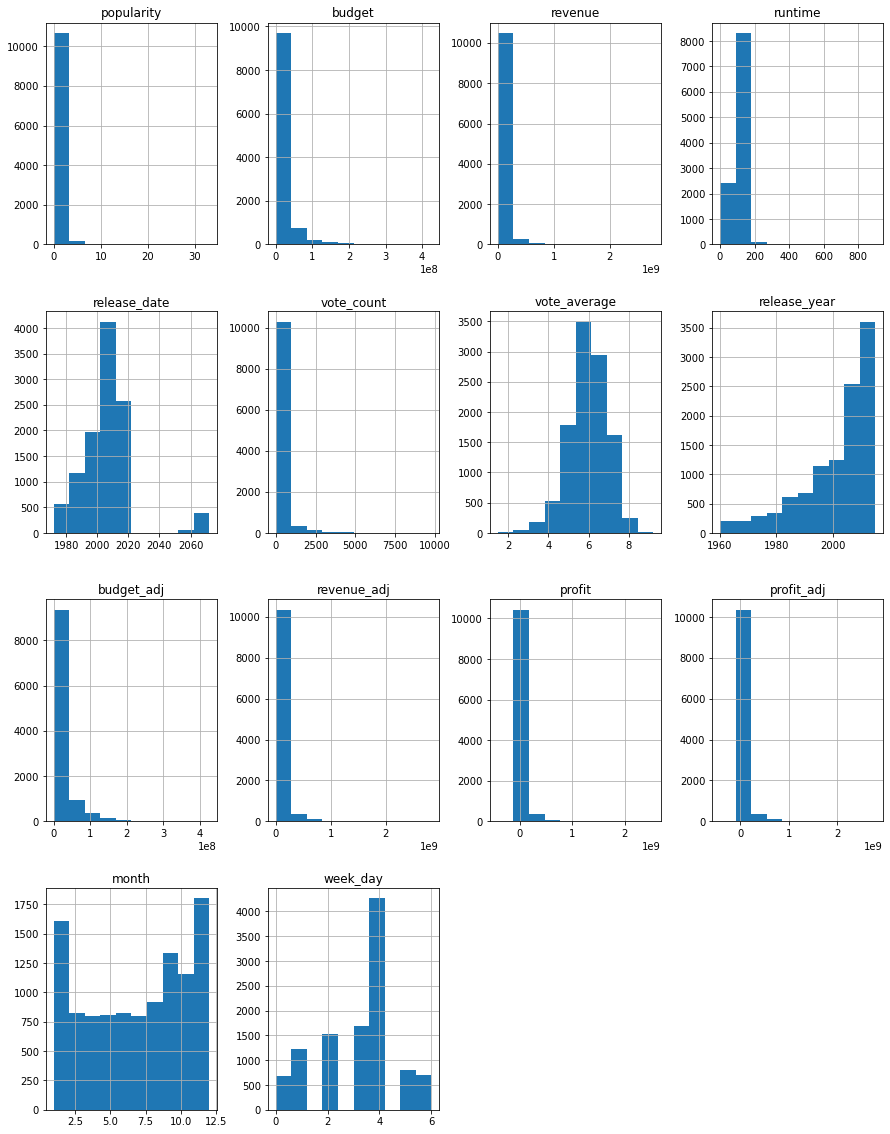

In [48]:
fig= plt.figure(figsize = (15,20))
ax = fig.gca()
dta.hist(ax = ax);

In [19]:
dta.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,2.520261e+07,3.674472e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,9.659103e+07,1.277058e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,9.092453e+06,1.598169e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.778712e+09


#### From the above histogram we see generally that profit and profit_adj has some losses, seeing it starts a little before zero , we see that profit has a range of -413million to 2.5 billion, which is close to the adjusted rate with inflation accounted for as at  2010, which has a range of -413million to 2.7 billion. to further investigate we would check for the average profit made each year.

In [20]:
dta.groupby(['release_year'],as_index=False)['profit','profit_adj'].mean()

C:\Users\IJ\AppData\Local\Temp\ipykernel_6716\629070213.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dta.groupby(['release_year'],as_index=False)['profit','profit_adj'].mean()


,release_year,profit,profit_adj
0,1960,3.842127e+06,3.272063e+07
1,1961,9.405909e+06,7.798338e+07
2,1962,5.026804e+06,4.685232e+07
3,1963,3.355103e+06,3.708899e+07
4,1964,7.178539e+06,5.613595e+07
5,1965,1.108219e+07,8.857084e+07
6,1966,5.909106e+05,1.112408e+07
7,1967,1.592956e+07,1.180600e+08
8,1968,4.943435e+06,4.070929e+07
9,1969,6.510580e+06,4.541988e+07


In [21]:
# we Find the average profit and profit_adj of each year with groupby

pt=dta.groupby(['release_year'],as_index=False)['profit','profit_adj'].mean()


C:\Users\IJ\AppData\Local\Temp\ipykernel_6716\4001727433.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pt=dta.groupby(['release_year'],as_index=False)['profit','profit_adj'].mean()


Text(0.5, 1.0, 'Profit Across the Years')

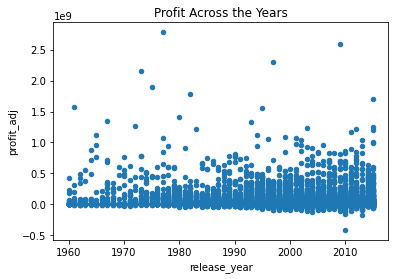

In [54]:
scatter('release_year', 'profit_adj', dta)
plt.title('Profit Across the Years')

#### from the graph above we see that a movie in 2010 had the greatest loss and a movie between 1970 -1980 made the highest profit, of which we can call these outliers,
> but generally a few losses has been spread through the years, all the years record a majority of profits
> 

In [43]:
pt.describe()

,release_year,profit,profit_adj
count,56.000000,5.600000e+01,5.600000e+01
mean,1987.500000,2.092585e+07,5.048083e+07
std,16.309506,9.121204e+06,2.421968e+07
min,1960.000000,5.909106e+05,1.112408e+07
25%,1973.750000,1.585978e+07,3.679201e+07
50%,1987.500000,2.284545e+07,4.552750e+07
75%,2001.250000,2.695966e+07,5.891567e+07
max,2015.000000,3.594547e+07,1.348014e+08


Text(0.5, 1.0, 'Average Profit Data')

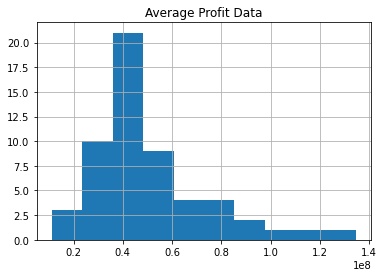

In [52]:
pt.profit_adj.hist();
plt.title('Average Profit Data')

## Conclusion

### from the average profit across the years we can see that the movie industry ranges from 11 million to 135 million. Most year did an average of 50 million dollar profit, (we used the profit that has been adjusted). we can say that the movie indusry is a very profitale industry.

### Research Question 2  How does popularity affect profits?

Text(0.5, 1.0, ' Profit Based on Popularity')

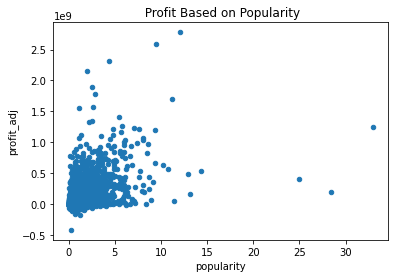

In [55]:
# we would analize this by ploting a scatter graph to see the correlation between popularity and profits 

# here we would be using the adjusted profit data
scatter('popularity', 'profit_adj', dta)
plt.title(' Profit Based on Popularity')

#### here we see a strong positive corrolation between profit and popularity, we can also see some outliers within the range of point 15-32 which can be removed from the data to analyse correctly , without the outliers we see that the popularity ranges normally from 0-14.
>from the graph here we also see that the few movies that made losses fell in the unpopular range that is range 0-5 and the other range 5-15 recorded mostly profits 

In [27]:
#we would sort the data bu popularity and then delete the unwanted popularity data
dta_p = dta.sort_values(['popularity'], ascending=[False])
dta_p.head()

,,,,,,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
id,original_title,director,production_companies,cast,tagline,,,,,,,,,,,,
135397,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,The park is open.,32.985763,150000000,1513528810,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.242446e+09
76341,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Productions,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,What a Lovely Day.,28.419936,150000000,378436354,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,1.981613e+08
157336,Interstellar,Christopher Nolan,Paramount Pictures|Legendary Pictures|Warner Bros.|Syncopy|Lynda Obst Productions,Matthew McConaughey|Jessica Chastain|Anne Hathaway|Michael Caine|Casey Affleck,Mankind was born on Earth. It was never meant to die here.,24.949134,165000000,621752480,169,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,456752480,4.076906e+08
118340,Guardians of the Galaxy,James Gunn,Marvel Studios|Moving Picture Company (MPC)|Bulletproof Cupid|Revolution Sun Studios,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Diesel|Bradley Cooper,All heroes start somewhere.,14.311205,170000000,773312399,121,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08,603312399,5.422911e+08
262500,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,One Choice Can Destroy You,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.616190e+08


In [28]:
#deleting outliers in popularity
dta_p.drop(dta_p.index[0:3], inplace= True)
dta_p.head()

,,,,,,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
id,original_title,director,production_companies,cast,tagline,,,,,,,,,,,,
118340,Guardians of the Galaxy,James Gunn,Marvel Studios|Moving Picture Company (MPC)|Bulletproof Cupid|Revolution Sun Studios,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Diesel|Bradley Cooper,All heroes start somewhere.,14.311205,170000000,773312399,121,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08,603312399,5.422911e+08
262500,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,One Choice Can Destroy You,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.616190e+08
100402,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,Marvel Studios,Chris Evans|Scarlett Johansson|Sebastian Stan|Samuel L. Jackson|Robert Redford,In heroes we trust.,12.971027,170000000,714766572,136,2014-03-20,3848,7.6,2014,1.565855e+08,6.583651e+08,544766572,4.883651e+08
11,Star Wars,George Lucas,Lucasfilm|Twentieth Century Fox Film Corporation,Mark Hamill|Harrison Ford|Carrie Fisher|Peter Cushing|Alec Guinness,"A long time ago in a galaxy far, far away...",12.037933,11000000,775398007,121,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,764398007,2.778712e+09
245891,John Wick,Chad Stahelski|David Leitch,Thunder Road Pictures|Warner Bros.|87Eleven|DefyNite Films|MJW Films,Keanu Reeves|Michael Nyqvist|Alfie Allen|Willem Dafoe|Dean Winters,Don't set him off.,11.422751,20000000,78739897,101,2014-10-22,2712,7.0,2014,1.842182e+07,7.252661e+07,58739897,5.252661e+07


Text(0.5, 1.0, 'Profit Based on Popularity_adj')

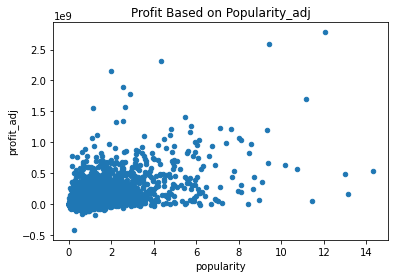

In [56]:
scatter('popularity', 'profit_adj', dta_p)
plt.title('Profit Based on Popularity_adj')
#this gives us a better analysis which removes the outliers
#we can see a strong corrolation of profit to popularity
#popularity_adj is adjusted popularity

## Conclusion
### Popularity is a key factor in making profits as we saw that the few movies that made losses fell in the unpopular range that is range 0-5 and the other range 5-15 recorded mostly profits.

## Limitation
### popularity data here does not tell us how it was being measured , as we are just given different number as points. More questions on why a movie is popular comes to mind 

### Research Question 3: How does runtime affect profits?


Text(0.5, 1.0, 'Profit Based on Runtime')

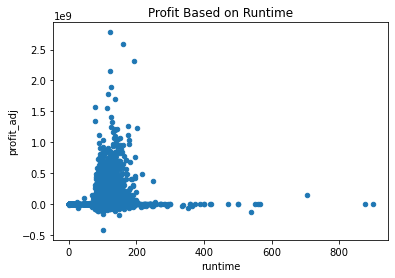

In [57]:
# we would analize this by ploting a scatter graph to see the correlation between runtime and profits 

# here we would be using the adjusted profit data
scatter('runtime', 'profit_adj', dta)
plt.title('Profit Based on Runtime')

In [31]:
dta.runtime.mean()
#From the above we can see outliers which can distort the average time

102.07179015186378

In [32]:
dta_r = dta.sort_values(['runtime'], ascending=[False])
dta_r.head()

,,,,,,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
id,original_title,director,production_companies,cast,tagline,,,,,,,,,,,,
125336,The Story of Film: An Odyssey,Mark Cousins,NaN,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp|Agnes de Mille,NaN,0.006925,0,0,900,2011-09-03,14,9.2,2011,0.0,0.000000e+00,0,0.000000e+00
150004,Taken,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Fawcett|Tobe Hooper|Jeremy Kagan|Michael Katleman|Sergio Mimica-Gezzan|Bryan Spicer|Thomas J. Wright,DreamWorks,Dakota Fanning|Matt Frewer|Eric Close|Emily Bergl|Heather Donahue,Some secrets we keep. Some are kept from us,0.469332,0,0,877,2002-12-02,38,6.8,2002,0.0,0.000000e+00,0,0.000000e+00
331214,Band of Brothers,Phil Alden Robinson|Richard Loncraine|Mikael Salomon|David Nutter|Tom Hanks|David Leland|David Frankel|Tony To,HBO,Damian Lewis|Ron Livingston|Frank John Hughes|Frank John Hughes|Scott Grimes,Ordinary men. Extraordinary times.,0.537593,0,125000000,705,2001-09-09,313,8.0,2001,0.0,1.539360e+08,125000000,1.539360e+08
42044,Shoah,Claude Lanzmann,British Broadcasting Corporation (BBC)|MinistÃ¨re de la Culture de la Republique FranÃ§aise|Les Films Aleph|Historia,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,NaN,0.147489,0,0,566,1985-11-01,16,8.3,1985,0.0,0.000000e+00,0,0.000000e+00
18729,"North and South, Book I",NaN,NaN,Patrick Swayze|Philip Casnoff|Kirstie Alley|Genie Francis|Georg Stanford Brown,NaN,0.000065,0,0,561,1985-11-03,17,6.0,1985,0.0,0.000000e+00,0,0.000000e+00


In [33]:
#deleting outliers in runtime
dta_r.drop(dta_r.index[0:3], inplace= True)
dta_r.head()

,,,,,,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
id,original_title,director,production_companies,cast,tagline,,,,,,,,,,,,
42044,Shoah,Claude Lanzmann,British Broadcasting Corporation (BBC)|MinistÃ¨re de la Culture de la Republique FranÃ§aise|Les Films Aleph|Historia,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,NaN,0.147489,0,0,566,1985-11-01,16,8.3,1985,0.0,0.0,0,0.0
18729,"North and South, Book I",NaN,NaN,Patrick Swayze|Philip Casnoff|Kirstie Alley|Genie Francis|Georg Stanford Brown,NaN,0.000065,0,0,561,1985-11-03,17,6.0,1985,0.0,0.0,0,0.0
192040,Planet Earth,Alastair Fothergill,NaN,David Attenborough,planet earth as you've never seen it before,0.137913,0,0,550,2006-12-10,65,7.6,2006,0.0,0.0,0,0.0
189197,The Pacific,Jeremy Podeswa|Tim Van Patten|David Nutter|Graham Yost|Carl Franklin|Tony To,Playtone|HBO|DreamWorks Television,James Badge Dale|Joseph Mazzello|Jon Seda|Ashton Holmes|William Sadler,Hell was an ocean away,0.757082,120000000,0,540,2010-05-16,183,7.8,2010,120000000.0,0.0,-120000000,-120000000.0
118309,John Adams,Tom Hooper,NaN,Paul Giamatti|Laura Linney|Stephen Dillane|Tom Wilkinson|David Morse,Join or Die,0.136540,0,0,501,2008-03-16,33,6.6,2008,0.0,0.0,0,0.0


In [34]:
dta_r.describe()
#average runtime here is 102 approximately outliers made a little difference

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
count,10862.000000,1.086200e+04,1.086200e+04,10862.000000,10862.000000,10862.000000,10862.000000,1.086200e+04,1.086200e+04,1.086200e+04,1.086200e+04
mean,0.646531,1.462833e+07,3.982639e+07,101.871479,217.426073,5.974452,2001.320935,1.755474e+07,5.136902e+07,2.519806e+07,3.674069e+07
std,1.000348,3.091760e+07,1.170203e+08,28.943443,575.717510,0.934519,12.814691,3.431102e+07,1.446533e+08,9.659902e+07,1.277175e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-4.139124e+08
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.383829,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.714062,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,9.083358e+06,1.598142e+07
max,32.985763,4.250000e+08,2.781506e+09,566.000000,9767.000000,8.900000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.778712e+09


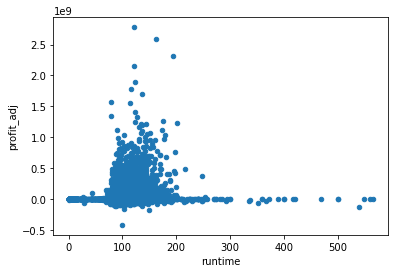

In [35]:
scatter('runtime', 'profit_adj', dta_r)
plt.title('Profit Based on Runtime_adj')
#Runtime_adj is the adjusted runtime (removing the outliers)

#### This scatter plot seems interesting as we see that the most profitable movies fall in an estimated range of 75 to 250 minutes of watch hour any movie higher or lower than this range has little or no profit, although within this range is an outlier showing massive loss at 100 minute runtime


## Conclusion
### Run time is a huge factor in determining the profit of a movie, it can be advisable to consider movies to be 30 minutes range from the average runtime to be profitable
### runtime also shows viewers attention span to movies irrespective of the genre.
## Limitation
### The data recorded a few runtime that was 0, if this was accurate then no movie was actually made. If other colums where being filled, it posses that the data has errors in it.

### Research Question 3: How does release date affect profits?

In [36]:
# here we would answer the question at what month of the year are release dates of movies most profitable.
# first we create a new colunm for months data
dta['month']= dta["release_date"].dt.month
dta.head()

,,,,,,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,month
id,original_title,director,production_companies,cast,tagline,,,,,,,,,,,,,
135397,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,The park is open.,32.985763,150000000,1513528810,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.242446e+09,6
76341,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Productions,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,What a Lovely Day.,28.419936,150000000,378436354,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,1.981613e+08,5
262500,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,One Choice Can Destroy You,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.616190e+08,3
140607,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,Every generation has a story.,11.173104,200000000,2068178225,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.702723e+09,12
168259,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,Vengeance Hits Home,9.335014,190000000,1506249360,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.195749e+09,4


In [37]:
#We would find the average profit made within each release_date month(time of the year),vote counts and vote average in this data
dta.groupby(['month','vote_count','vote_average'])['profit_adj'].mean()

month  vote_count  vote_average
1      10          2.2             0.000000e+00
                   2.4             0.000000e+00
                   3.2             0.000000e+00
                   3.6             0.000000e+00
                   3.8             0.000000e+00
                                       ...     
12     5292        7.5             1.702723e+09
       5636        7.9             1.232278e+09
       6079        7.8             9.800798e+08
       7375        7.7             3.039911e+08
       8458        7.1             2.590124e+09
Name: profit_adj, Length: 9374, dtype: float64

Text(0.5, 1.0, 'Average Profit In The Month')

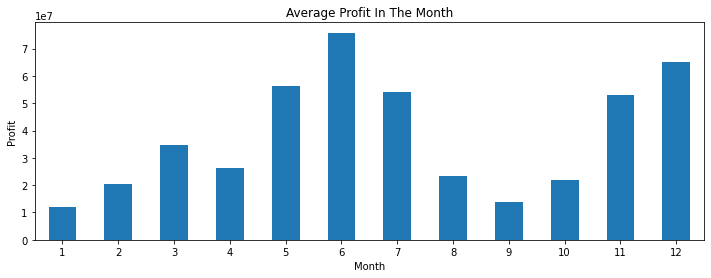

In [42]:
#plotting the pattern of profit across the month where 1-12 is January to December respectively
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12,4))
dta.groupby('month')['profit_adj'].mean().plot(kind='bar', rot=0, ax=axs);
plt.xlabel('Month');
plt.ylabel('Profit');
plt.title('Average Profit In The Month')

#### Here we can see that the most profitable month of the year to release a movie is the 6th month which is June, followed by december. A deeper dive into this analyses may be as a result of holidays. its wise to target the release of a movie im these months 

In [39]:
# also we find the average profit made within the weekday of the of the release date.
# we create a new colunm for week_day data with Monday=0 and Sunday=6
dta['week_day']= dta["release_date"].dt.weekday
dta.head()

,,,,,,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,month,week_day
id,original_title,director,production_companies,cast,tagline,,,,,,,,,,,,,,
135397,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,The park is open.,32.985763,150000000,1513528810,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.242446e+09,6,1
76341,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Productions,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,What a Lovely Day.,28.419936,150000000,378436354,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,1.981613e+08,5,2
262500,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,One Choice Can Destroy You,13.112507,110000000,295238201,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.616190e+08,3,2
140607,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,Every generation has a story.,11.173104,200000000,2068178225,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.702723e+09,12,1
168259,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,Vengeance Hits Home,9.335014,190000000,1506249360,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.195749e+09,4,2


Text(0.5, 1.0, 'Average Profit in the Week')

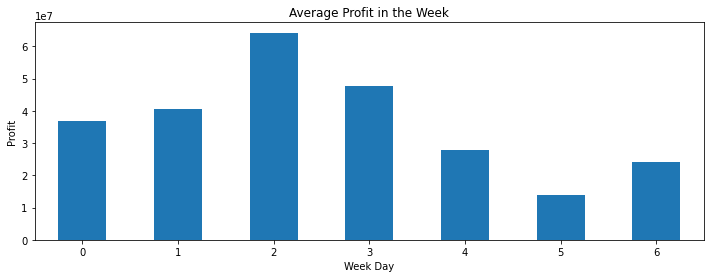

In [41]:
fig, axs = plt.subplots(figsize=(12,4))
dta.groupby('week_day')['profit_adj'].mean().plot(kind='bar', rot=0, ax=axs);
plt.xlabel('Week Day');
plt.ylabel('Profit');
plt.title('Average Profit in the Week')

#### Here we can see that the best day of the week to release a movie is Wednesdays followed by Thursdays and a week day to avoid is on a Saturday, to dive deep into the reason why Saturdays are not so good for release, we can check more on the average votecount and day of the week

In [ ]:
fig, axs = plt.subplots(figsize=(12,4))
dta.groupby('week_day')['vote_count'].mean().plot(kind='bar', rot=0, ax=axs);
plt.xlabel('Week Day');
plt.ylabel('Vote Counts');

#### here we see that the bar charts are almost the same, having Wednesdays as the days viewers vote more followed by Thursdays, and so more profit is made when viewers vote more. Since viewers vote the least on Saturdays, Saturdays are not a good week days to release a movie.

In [ ]:
scatter('vote_count', 'profit_adj', dta)
#there is a strong correlation between vote counts and profits

<a id='conclusions'></a>
## Conclusions

> Generally its good to know the factors that makes a movie profitable and to take avantage of those factors 
> From our analyses we see that the movie industry as a whole is a profitable one which makes an average of 50 million dollar profit per year, where inflation has been accounted for as at 2010
> Popularity is a factor in making profits, but we have a limitation of what measurement was used to get the popularity points, which makes it an unreliable factor.
> Runtime is a key factor in making profits, we saw that the average runtime for a profitable movie is 102 minutes,Directors can take a clue fom this and make their movies about 30 minutes within the average runtime.
> We saw that Wednesdays and Thurdays are best to release a movie in the months of June or December to be most profitable. We also se that this is influenced by the vote count. Viewers seem available to vote on these same times. An investigation to this might show the availablity of veiwers at these month.

## Limitations
> We found some errors which posses questions like;How the popularity is being measured, what are the factors that determine the popularity figures in this data set.
> we saw some recording of zero runtime and , if that is possible then no movie was made, so there might have been few data entry errors
> Other factors affect the vote count, which affects the profit and we would have loved to explore more if influences like, age groups, holidays and more data on the viewers were included.



### References 
>www.google.com
>https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
>https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/